# dataset reader

assumed is that you have dataset created with the directory structure

This can be done by zipping the structure from somewhere else


In [1]:
from __future__ import print_function

import numpy as np
import cv2
import math
from datetime import datetime
from collections import OrderedDict
import logging
from datetime import datetime
from six.moves import xrange
from scipy.io import loadmat
from tqdm import tqdm, trange
import os
import glob
from six.moves import cPickle as pickle
import random


import tensorflow as tf
import TensorflowUtils as utils
from tensorflow.python.platform import gfile
import ModelLibrary as model
#import DatasetReader as dataset
import BatchDatsetReader as dataset
import read_HUGdata as HUGdata

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt

from tf_unet import util
from tf_unet.layers import (weight_variable, weight_variable_devonc, bias_variable, 
                            conv2d, deconv2d, max_pool, crop_and_concat, pixel_wise_softmax_2,
                            cross_entropy)

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [2]:
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
def color_image(image, num_classes=20):
    import matplotlib as mpl
    import matplotlib.cm
    norm = mpl.colors.Normalize(vmin=0., vmax=num_classes)
    mycm = mpl.cm.get_cmap('Set3')
    return mycm(norm(image))

In [11]:
def predict_and_display(valid_images, valid_annotations, NUM_OF_CLASSESS):
    
    
    unique, counts = np.unique(valid_annotations, return_counts=True)
    for n in range(len(unique)):
        print(unique[n], counts[n])

    fig = plt.figure()
    fig.set_size_inches(18, 5)

    

    patch = fig.add_subplot(1,3,1)
    patch.axes.get_xaxis().set_visible(False)
    patch.axes.get_yaxis().set_visible(False)
    patch.imshow(valid_images[0]);


    new_image = color_image(valid_annotations[0], NUM_OF_CLASSESS)
    patch = fig.add_subplot(1,3,2)
    patch.axes.get_xaxis().set_visible(False)
    patch.axes.get_yaxis().set_visible(False)
    patch.imshow(new_image);
    
    patch = fig.add_subplot(1,3,3)
    patch.axes.get_xaxis().set_visible(False)
    patch.axes.get_yaxis().set_visible(False)
    patch.imshow(valid_images[0]);
    masked_imclass = np.ma.masked_where(new_image == 0, new_image)
    plt.imshow( masked_imclass, alpha=0.5 )


In [6]:

DATA_DIR = "dataJul4/"

print("Setting up image reader...")
train_records, valid_records = HUGdata.read_dataset(DATA_DIR)
print(len(train_records))
print(len(valid_records))

Setting up image reader...
Found pickle file!
46
2


In [7]:
BATCH_SIZE = 1
IMAGE_SIZE = 512

In [8]:
print("Setting up dataset reader")
image_options = {'resize': True, 'resize_size': IMAGE_SIZE, 'color': False}

train_dataset_reader = dataset.BatchDatset(train_records, image_options)
validation_dataset_reader = dataset.BatchDatset(valid_records, image_options)

Setting up dataset reader
Initializing Batch Dataset Reader...
options : {'resize_size': 512, 'color': False, 'resize': True}
images      :  (46, 512, 512, 1)
annotations :  (46, 512, 512, 1)
Initializing Batch Dataset Reader...
options : {'resize_size': 512, 'color': False, 'resize': True}
images      :  (2, 512, 512, 1)
annotations :  (2, 512, 512, 1)


In [9]:
train_images, train_annotations = train_dataset_reader.get_records()
validation_images, validation_annotations = validation_dataset_reader.get_records()
print(train_images.shape)
print(train_annotations.shape)
print(validation_images.shape)
print(validation_annotations.shape)

(46, 512, 512, 1)
(46, 512, 512, 1)
(2, 512, 512, 1)
(2, 512, 512, 1)


In [ ]:
np.save("train_images", train_images)
np.save("validation_images", validation_images)
np.save("train_annotations", validation_images)
np.save("validation_annotations", validation_annotations)

batch 2 of 1 images of total of 46
(1, 512, 512, 1) (1, 512, 512, 1)
0 252076
6 10068


<IPython.core.display.Javascript object>


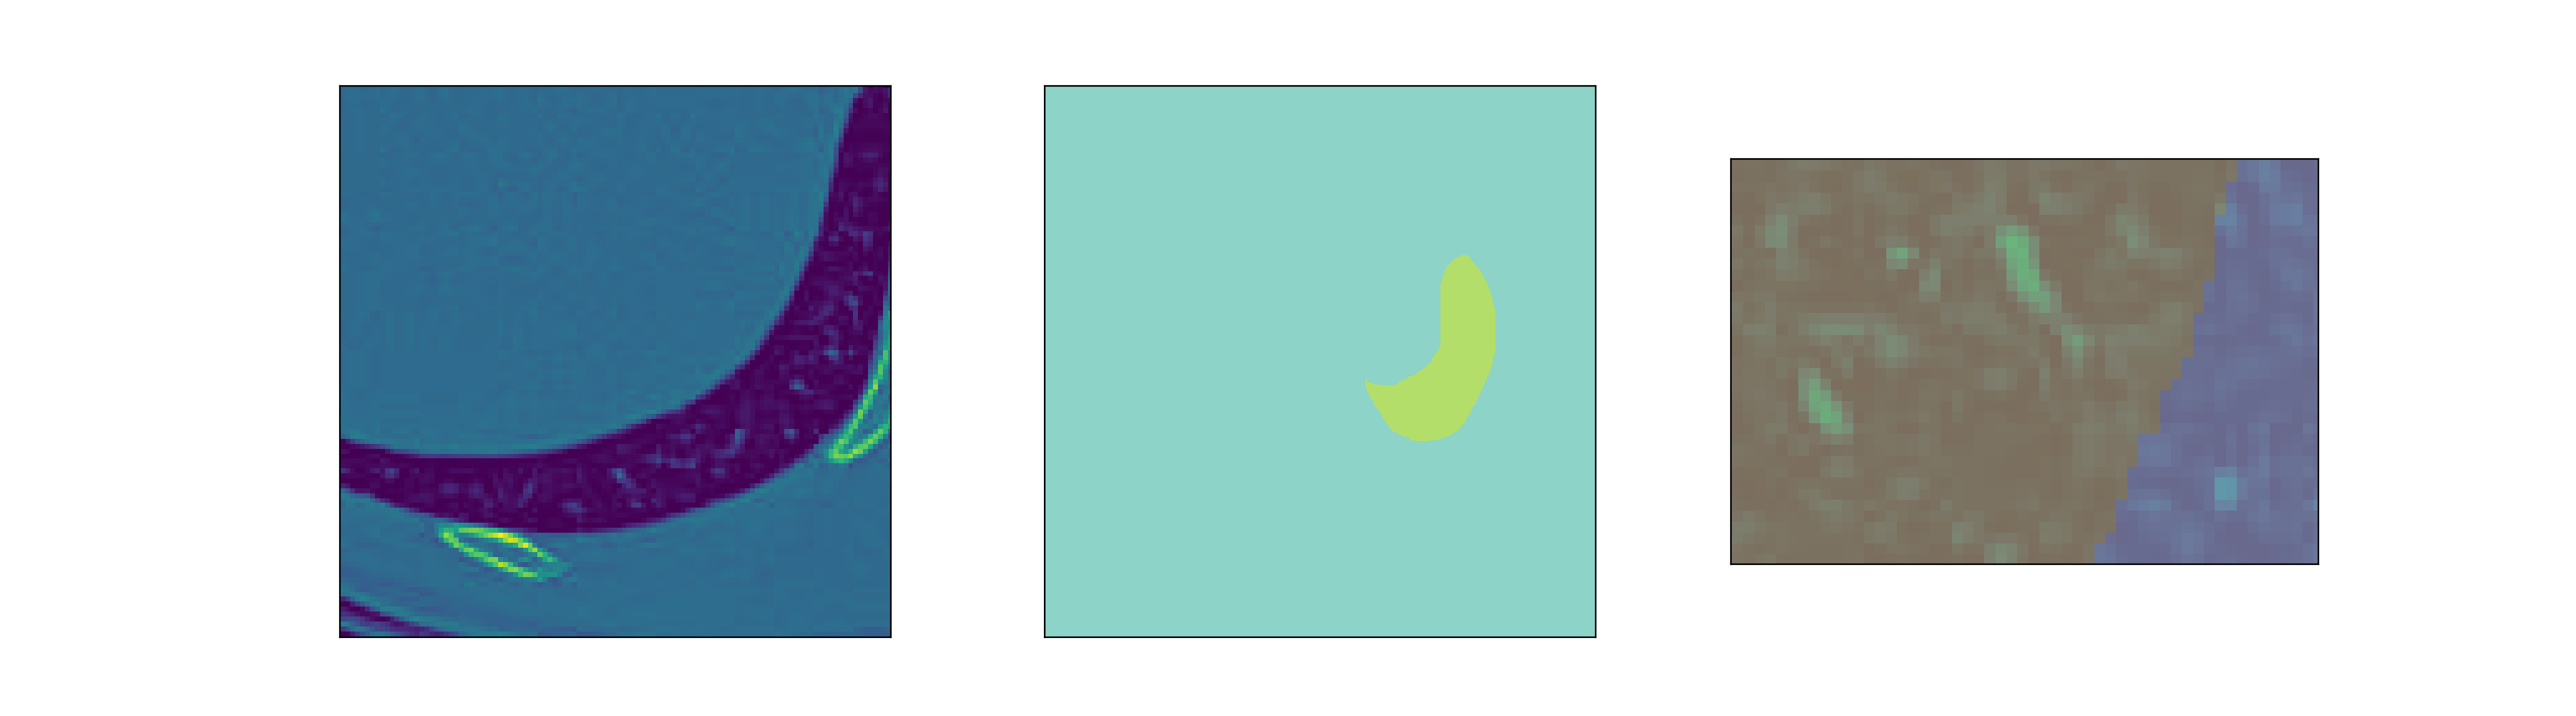

In [13]:
image, label = train_dataset_reader.next_batch(1)
print(image.shape, label.shape)

NUM_OF_CLASSESS = 11
predict_and_display(np.squeeze(image, axis=3), np.squeeze(label, axis=3), NUM_OF_CLASSESS)